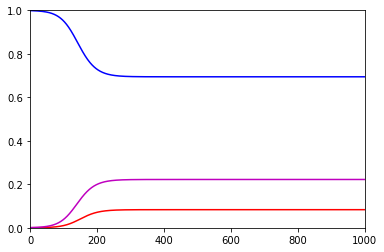

      xPlots    wPlots    dPlots    hPlots
0          0  0.999000  0.001000  0.000000
1          1  0.998800  0.000240  0.000960
2          2  0.998752  0.000250  0.000998
3          3  0.998702  0.000260  0.001038
4          4  0.998651  0.000270  0.001079
5          5  0.998597  0.000281  0.001122
6          6  0.998541  0.000292  0.001167
7          7  0.998483  0.000304  0.001213
8          8  0.998423  0.000316  0.001261
9          9  0.998360  0.000329  0.001311
10        10  0.998295  0.000342  0.001363
11        11  0.998227  0.000355  0.001418
12        12  0.998157  0.000369  0.001474
13        13  0.998083  0.000384  0.001532
14        14  0.998007  0.000399  0.001593
15        15  0.997928  0.000415  0.001657
16        16  0.997846  0.000432  0.001722
17        17  0.997760  0.000449  0.001791
18        18  0.997672  0.000467  0.001862
19        19  0.997579  0.000485  0.001935
20        20  0.997483  0.000505  0.002012
21        21  0.997384  0.000525  0.002092
22        2

0

In [2]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#graphing functions
def plot_2D(graphInfo, title="Generation plot"):
    fig=plt.figure()
    plt.plot(graphInfo["xPlots"],graphInfo["wPlots"],'b-')
    plt.plot(graphInfo["xPlots"],graphInfo["dPlots"],'r-')
    plt.plot(graphInfo["xPlots"],graphInfo["hPlots"],'m-')
    plt.axis([0,len(graphInfo["xPlots"]),0,1])
    plt.show()
def model3D(X,Y,Z,xLabel,yLabel, title):
    #3D graph
    import matplotlib.pyplot as plt
    from matplotlib import cm
    min=1000
    max=-1000
    for rIndex in range(len(Z)):
        for cIndex in range(len(Z[rIndex])):
            if Z[rIndex][cIndex]<min:
                min=Z[rIndex][cIndex]
            if Z[rIndex][cIndex]>max:
                max=Z[rIndex][cIndex]
    if min<-max:
        max=-min
    else:
        min=-max
    
    #label axes
    plt.xlabel(xLabel, fontdict=None, labelpad=None)
    plt.ylabel(yLabel, fontdict=None, labelpad=None)
    plt.title(title)

    
    plt.axis(aspect='image');
    plt.imshow(Z, origin='lower', extent=([0, 1, 0, 1]), vmax=max, vmin=min, cmap=cm.coolwarm)
    plt.show()
#model functions
def update_vars(oldDataDict, newDataDict):
    for key in newDataDict.keys():
        oldDataDict[key]=newDataDict[key]
    return oldDataDict
def run_generation(simData):
    #apply fitness
    qW=simData['qW']*simData['fW']
    qD=simData['qD']*simData['fD']
    qH=simData['qH']*simData['fH']
    #bring total frequency back up to 1
    total=qW+qD+qH
    qW/=total
    qD/=total
    qH/=total
    e=simData['e']
    #variables to prvent redundant multiplication
    w2=qW*qW
    wd=qW*qD
    wh=qW*qH
    d2=qD*qD
    dh=qD*qH
    h2=qH*qH
    #calculate next gen frequencies
    qWP=w2+wh+.25*h2
    qDP=e*(2*wd+wh+dh+.5*h2)+d2+dh+.25*h2
    qHP=(1-e)*(2*wd+wh+dh+.5*h2)
    #catch rounding errors from float multiplication
    total=qWP+qDP+qHP
    if total!=1:
        qWP/=total
        qDP/=total
        qHP/=total
    return {'qW':qWP,'qD':qDP,'qH':qHP}
def run_simulation(simData,graph=False,debug=False):
    graphInfo={"xPlots": [0], "wPlots": [simData['qW']], "dPlots": [simData['qD']], "hPlots": [simData['qH']]}
    for i in range(1,simData['generations']+1):
        update_vars(simData,run_generation(simData))
        graphInfo['xPlots'].append(i)
        graphInfo['wPlots'].append(simData['qW'])
        graphInfo['dPlots'].append(simData['qD'])
        graphInfo['hPlots'].append(simData['qH'])
        if simData['qW']>.99999:
            if graph:
                plot_2D(graphInfo)
            if debug:
                print(pd.DataFrame(graphInfo))
            return -i
        elif simData['qD']>.99999:
            if graph:
                plot_2D(graphInfo)
            if debug:
                print(pd.DataFrame(graphInfo))
            return i
    if graph:
        plot_2D(graphInfo)
    if debug:
        print(pd.DataFrame(graphInfo))
    return 0

simData={'qW':.999,'qD':.001,'qH':0,'fW':1,'fD':.6,'fH':1,'e':.2,'eP':0,'a':0,'generations':1000}
run_simulation(simData,True,True)

